## 1. Import Library

In [23]:
import tensorflow as tf
import pandas as pd
import datetime
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50
from tensorflow.keras import optimizers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, roc_auc_score, auc, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

## 2. Preprocessing Data

In [2]:
train_path='Dataset/train/'
test_path='Dataset/test/'
num_classes=3

In [3]:
train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, target_size=(244,244), 
                                                                     color_mode='rgb', batch_size=30, shuffle=True)

Found 390 images belonging to 3 classes.


## 3. Create The Model

In [4]:
model=ResNet50(weights='imagenet', include_top=True)
model.layers.pop()
new_layer=Dense(num_classes, activation='softmax', name='prediction_1')
model=Model(model.input, new_layer(model.layers[-1].output))

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

## 4. Training The Model

In [6]:
sgd=tf.keras.optimizers.legacy.SGD(lr=0.0001, decay=0.0001)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\LENOVO\Desktop\Portfolio_AI\Classification_Pneumonia_Covid19\venv\Lib\site-packages\keras\src\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97):
            self.model.stop_training=True

stopTraining=Callback()

In [8]:
history=model.fit_generator(train_batches, epochs=10, verbose=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13552\2803618879.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_batches, epochs=10, verbose=1)


Epoch 1/10


13/13 [==============================] - 169s 12s/step - loss: 1.0986 - accuracy: 0.3282
Epoch 2/10
13/13 [==============================] - 156s 12s/step - loss: 1.0985 - accuracy: 0.3487
Epoch 3/10
13/13 [==============================] - 167s 13s/step - loss: 1.0986 - accuracy: 0.3179
Epoch 4/10
13/13 [==============================] - 145s 11s/step - loss: 1.0985 - accuracy: 0.3128
Epoch 5/10
13/13 [==============================] - 167s 13s/step - loss: 1.0984 - accuracy: 0.3000
Epoch 6/10
13/13 [==============================] - 147s 11s/step - loss: 1.0984 - accuracy: 0.3462
Epoch 7/10
13/13 [==============================] - 140s 11s/step - loss: 1.0984 - accuracy: 0.3256
Epoch 8/10
13/13 [==============================] - 164s 13s/step - loss: 1.0984 - accuracy: 0.3282
Epoch 9/10
13/13 [==============================] - 170s 13s/step - loss: 1.0983 - accuracy: 0.3308
Epoch 10/10
13/13 [==============================] - 161s 12s/step - loss: 1.0984 - accuracy: 0.34

## 5. Prediksi Data Uji

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_path, batch_size=64, shuffle=False, target_size=(224,224))
predicts_vectors=model.predict_generator(test_generator, verbose=1)

Found 150 images belonging to 3 classes.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13552\3610195978.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicts_vectors=model.predict_generator(test_generator, verbose=1)


3/3 [==============================] - 20s 4s/step


In [14]:
pred=np.argmax(predicts_vectors, axis=1)

## 6. Validasi Hasil Prediksi Data Uji

In [16]:

lb=LabelBinarizer()
lb.fit(test_generator.labels)

y_test=lb.transform(test_generator.labels)
y_pred=lb.transform(pred)

auc_score=roc_auc_score(y_test, y_pred, average="macro")

In [17]:
y_true=test_generator.labels
y_pred=pred

recall=recall_score(y_true, y_pred, average='macro')
precision=precision_score(y_true, y_pred, average='macro')
f1=f1_score(y_true, y_pred, average='macro')
kappa=cohen_kappa_score(test_generator.labels, pred)
acc=accuracy_score(test_generator.labels, pred)

c:\Users\LENOVO\Desktop\Portfolio_AI\Classification_Pneumonia_Covid19\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


## Evaluation

In [20]:
print('>>>> RESULT <<<<')
print('Accuracy: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Score: {}'.format(f1))
print('AUC: {}'.format(auc_score))
print('Kappa: {}'.format(kappa))

>>>> RESULT <<<<
Accuracy: 33.33333333333333
Recall: 33.33333333333333
Precision: 11.11111111111111
F1-Score: 0.16666666666666666
AUC: 0.5
Kappa: 0.0


In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.33      1.00      0.50        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150



c:\Users\LENOVO\Desktop\Portfolio_AI\Classification_Pneumonia_Covid19\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Desktop\Portfolio_AI\Classification_Pneumonia_Covid19\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Desktop\Portfolio_AI\Classification_Pneumonia_Covid19\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

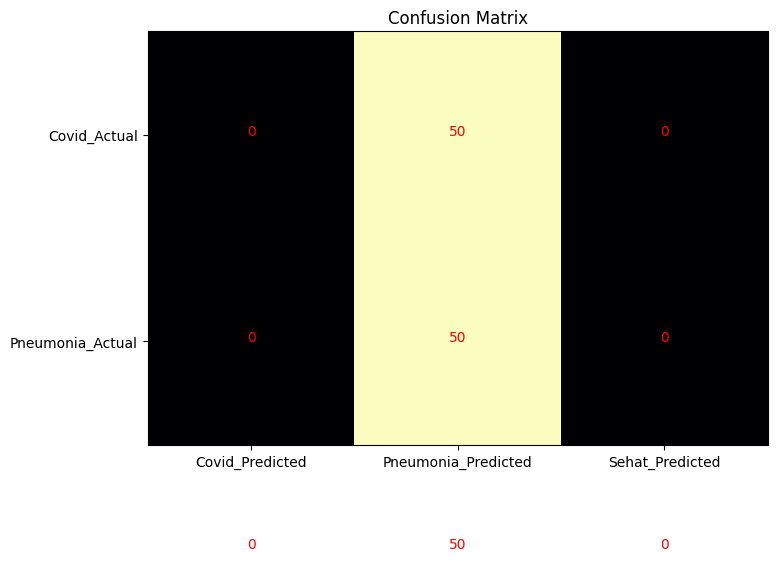

Accuracy: 0.3333
Sensitivity: 0.0000
Specificity: 1.0000


In [24]:
cm=confusion_matrix(y_test.argmax(axis=1), y_pred)
total=sum(sum(cm))
acc = (cm[0,0] + cm[1,1] + cm[2,2]) / total
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1] + cm[0,2])
specificity = cm[1,1] / (cm[1,0] + cm[1,1] + cm[1,2])

# Plot Confusion Matrix
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='magma')
ax.set_title("Confusion Matrix")
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Covid_Predicted', 'Pneumonia_Predicted', 'Sehat_Predicted'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Covid_Actual', 'Pneumonia_Actual', 'Sehat_Actual'))
ax.set_ylim(1.5, -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i,j], ha='center', color='red')
plt.show()

print("Accuracy: {:.4f}". format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))